In [122]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [123]:
from pathlib import Path

In [124]:
path = Path('/Users/olli/Desktop/Programming/Python/scripts/physics')

# IBM QUANTUM COMPUTING FIELD GUIDE NOTES

References: https://quantum-computing.ibm.com/composer/docs/guide/ 

## PRINCIPLES 

1. A physical system in a definite state can still behave randomly.

2. Two systems that are too far apart to influence each other can nevertheless behave in ways that, though individually random, are somehow strongly correlated

A quantum computer takes advantage of a special kind of superposition that allows for exponentially many logical states at once

The vast majority of quantum superpositions, and the ones most useful for quantum computation, are **entangled**. **Entangled states** are states of the whole computer that do not correspond to any assignment of digital or analog states of the individual qubits. 

## Notes 

05/05/21
* Remember to use the **inspect option** in the Quantum Composer to investigate the state vector progressing through the quantum circuit.

06/05/21
* https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary glossary of quantum gates
* The phase disk gives the local state of each qubit at the end of computation
* Up to Entanglement section in field guide

___
# Qubits and states

In [125]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_histogram
from numpy import pi

In [126]:
## first quantum circuit observing qubit in |0> state

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [127]:
circuit.reset(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

In [128]:
circuit.draw()

┌─┐
q_0: ─|0>─┤M├
          └╥┘
c: 1/══════╩═
           0

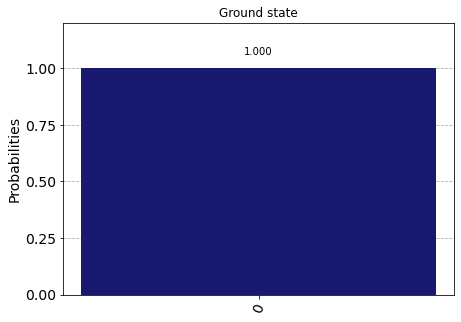

In [129]:
# getting the backend simulator and plotting
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Ground state")

## X NOT GATE

In [130]:
# bit flip circuit
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [131]:
circuit.reset(qreg_q[0])
circuit.x(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw()

┌───┐┌─┐
q_0: ─|0>─┤ X ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

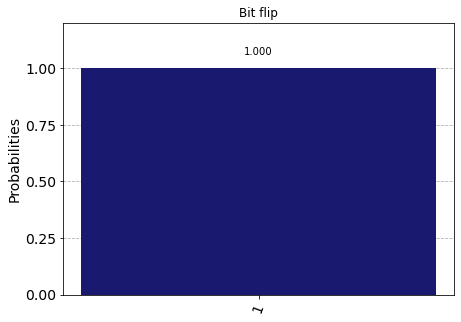

In [132]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Bit flip")

___
# Creating superposition and going beyond classical computers

* Reference: https://quantum-computing.ibm.com/composer/docs/guide/creating-superpositions
* Quantum logic gates: https://en.wikipedia.org/wiki/Quantum_logic_gate
* Hadamard product: https://en.wikipedia.org/wiki/Hadamard_product_(matrices)
* Logic gates and operations: https://quantum-computing.ibm.com/composer/docs/iqx/operations_glossary

Hadamard gates can be used to create superpositions of states.

In [133]:
# hadamard gate acting on |0> 
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

In [134]:
circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw()

┌───┐┌─┐
q_0: ─|0>─┤ H ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

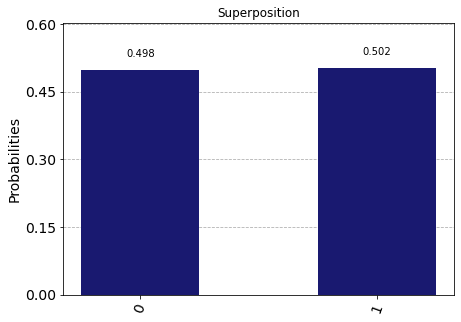

In [135]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Superposition")

## Visualizing the state vector

In [136]:
# using the qsphere to visualize the state vector on a simple quantum circuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

qreg_q = QuantumRegister(1, 'q')

qc = QuantumCircuit(qreg_q)
qc.h(qreg_q[0])

In [137]:
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘

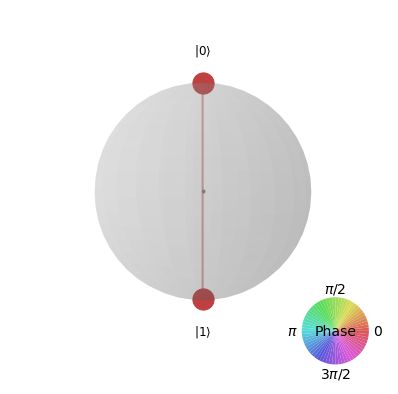

In [138]:
state = Statevector.from_instruction(qc)
plot_state_qsphere(state)

## HADAMARD GATE

In [139]:
# hadamard gate acting on |1>

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

In [140]:
circuit.draw()

┌───┐ ░ ┌───┐┌─┐
q_0: ─|0>─┤ X ├─░─┤ H ├┤M├
          └───┘ ░ └───┘└╥┘
c: 1/═══════════════════╩═
                        0

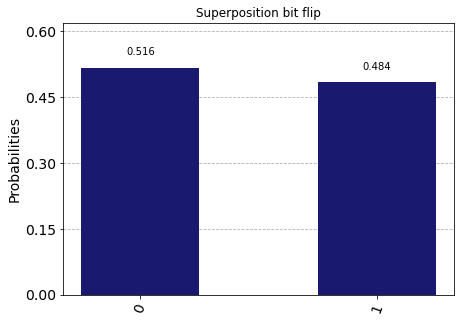

In [141]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Superposition bit flip")

## Interference of superpositions

In [142]:
# putting the circuits back to back will erase the randomness due to the fact that H*H = I 

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])

In [143]:
circuit.draw()

┌───┐ ░ ┌───┐┌─┐
q_0: ─|0>─┤ H ├─░─┤ H ├┤M├
          └───┘ ░ └───┘└╥┘
c: 1/═══════════════════╩═
                        0

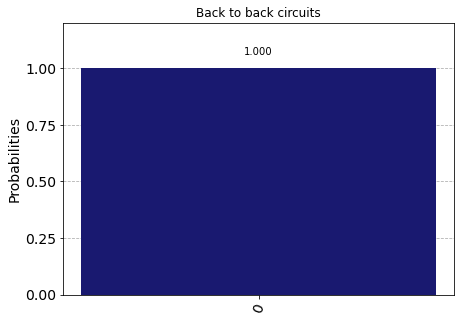

In [144]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Back to back circuits")

### Explaining the results

The Hadamard operator can be described as:
$$
H = \frac{1}{\sqrt2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

Hadamard gate acting on $|0>$: 
$$ H|0> = \frac{1}{\sqrt2} (|0> + |1>)$$
Hadamard gate acting on $|1>$: 
$$ H|1> = \frac{1}{\sqrt2}(|0> - |1>)$$

Effectively the second Hadamard gate acts on the output of the first Hadamard gate and the $|1>$ basis vector vanishes from the sum. 

**OR**

We can just calculate $H*H$: 

$$
H*H = \frac{1}{\sqrt2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\frac{1}{\sqrt2}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
= \begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$

Reference **Born Rule** for wave function and probability amplitudes: https://en.wikipedia.org/wiki/Born_rule

### Visualizing the state vector for the combination of both circuits

In [145]:
# using the qsphere to visualize the state vector on a simple quantum circuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

qreg_q = QuantumRegister(1, 'q')

qc = QuantumCircuit(qreg_q)
qc.h(qreg_q[0])
qc.barrier(qreg_q[0])
qc.h(qreg_q[0])

In [146]:
qc.draw()

┌───┐ ░ ┌───┐
q_0: ┤ H ├─░─┤ H ├
     └───┘ ░ └───┘

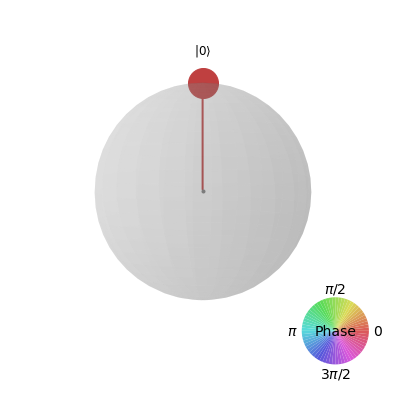

In [147]:
# we can see that the state vector is only pointed along |0> 
state = Statevector.from_instruction(qc)
plot_state_qsphere(state)

___
# Quantum Phase

General single-qubit quantum state is represented by a 2D vector space over the complex numbers $\mathbf{C}^2$: 

$$|\psi> = \alpha |0> + \beta |1>$$ 

With the assumptions:

* $|\alpha|^2 + |\beta|^2 = 1$
* The probability of obtaining $|0>$ is $|\alpha|^2$
* The probability of obtaining $|1>$ is $|\beta|^2$
* Phase ambiguity $e^{i\phi}$

We can rewrite the single qubit phase as: 

$$|\psi> = \sqrt{1-p} |0> + e^{i\phi}\sqrt{p} |1>$$ 


**Reference for phase operations** in QISKIT: https://quantum-computing.ibm.com/composer/docs/iqx/visualizations#phase-disk

The quantum composer has a number of phase shift gates such as: 

![image](md_images/phase_gates.png)

In [148]:
# example of different phase applied to superposition state
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.t(qreg_q[0])

In [149]:
circuit.draw()

┌───┐┌───┐
q_0: ─|0>─┤ H ├┤ T ├
          └───┘└───┘
c: 1/═══════════════

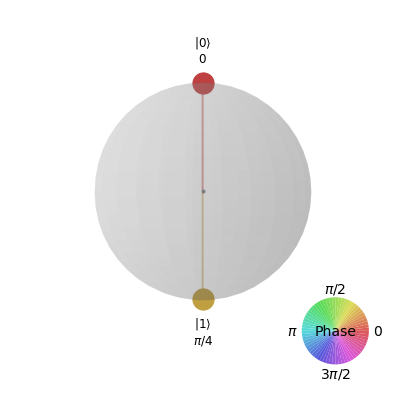

In [150]:
# we can see that the phase is more general 
state = Statevector.from_instruction(circuit)
plot_state_qsphere(state, show_state_phases=True)

## Ramsey X Circuit

The image below is a schematic of the **Ramsey X  Quantum Circuit**: 

![image](md_images/ramsey_x.png)


By applying a general phase shift gate of the form: 

$$
P(\phi) = \begin{pmatrix}
1 & 0 \\
0 & e^{j \phi}
\end{pmatrix}
$$

to the superposition state output from the Hadamard gate we obtain the state: 

$$|\psi> = \frac{1}{\sqrt{2}} (|0> + e^{i\phi}|1>)$$ 

Then when we apply the second Hadamard gate the state is interfered back to: 

$$|\psi> = \frac{1}{2} ( (1+e^{i\phi})|0> + (1-e^{i\phi})|1>)$$ 

Thus via the Born rule we obtain the probabilities: 

$$
p_0 = \frac{1}{2}(1+ cos(\phi))
\newline
p_1 = \frac{1}{2}(1-cos(\phi))
$$

and we define the difference: 

$$
d = p_0 - p_1
$$

Which is the real part of $e^{j\phi}$: 

$$
\begin{align*} 
x &=  d \\ 
 &=  cos(\phi) \\ 
 &=  \Re[e^{j\phi}]
\end{align*}
$$

In [151]:
# ramsey x quantum circuit
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.p(3*pi/4, qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.h(qreg_q[0])

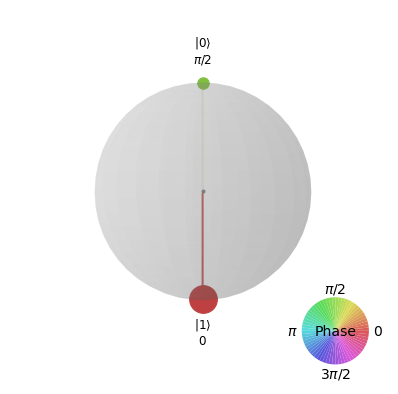

In [152]:
state = Statevector.from_instruction(circuit)
plot_state_qsphere(state, show_state_phases=True)

In [153]:
circuit.measure(qreg_q[0], creg_c[0])

In [154]:
circuit.draw()

┌───┐ ░ ┌─────────┐ ░ ┌───┐┌─┐
q_0: ─|0>─┤ H ├─░─┤ P(3π/4) ├─░─┤ H ├┤M├
          └───┘ ░ └─────────┘ ░ └───┘└╥┘
c: 1/═════════════════════════════════╩═
                                      0

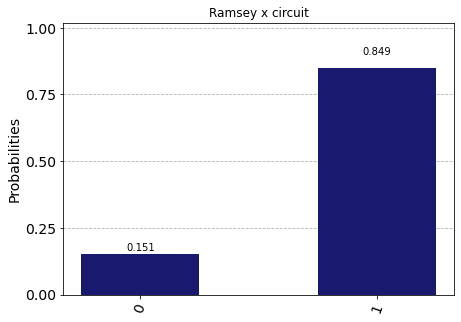

In [155]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="Ramsey x circuit")

In [156]:
# extracting the information
dataX = job.result().data()

## Ramsey Y Circuit

Following the same math as the Ramsey X circuit we find: 

$$
\begin{align*} 
y &=  d \\ 
 &=  sin(\phi) \\ 
 &=   \Im[e^{j\phi}]
\end{align*}
$$

And since we know both x any y we can can find the phase:

$$
\phi = \arctan (\frac{y}{x})
$$

In [157]:
# ramsey y quantum circuit
qreg_q = QuantumRegister(1, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.p(3*pi/4, qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.sdg(qreg_q[0])
circuit.h(qreg_q[0])

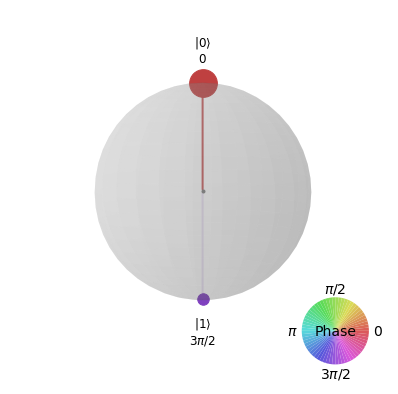

In [158]:
state = Statevector.from_instruction(circuit)
plot_state_qsphere(state, show_state_phases=True)

In [159]:
circuit.measure(qreg_q[0], creg_c[0])

In [160]:
circuit.draw()

┌───┐ ░ ┌─────────┐ ░ ┌─────┐┌───┐┌─┐
q_0: ─|0>─┤ H ├─░─┤ P(3π/4) ├─░─┤ SDG ├┤ H ├┤M├
          └───┘ ░ └─────────┘ ░ └─────┘└───┘└╥┘
c: 1/════════════════════════════════════════╩═
                                             0

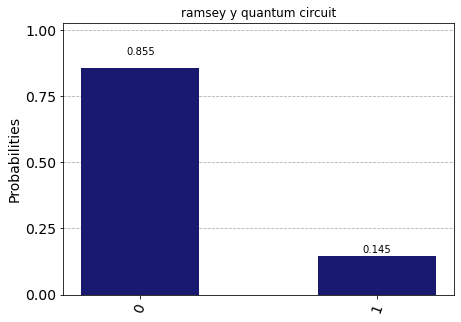

In [161]:
# here we see the simulation results of the ramsey y circuit
backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend)
plot_histogram(job.result().get_counts(), color='midnightblue', title="ramsey y quantum circuit")

In [162]:
# extracting the information
dataY = job.result().data()

### Normalized real and imaginary parts

Sometimes we have noise present so we have to account for this via **normalization**:

$$
\begin{align*} 
\bar{x} &=  \frac{x}{\sqrt{x^2 + y^2}} \\ 
\bar{y} &=  \frac{y}{\sqrt{x^2 + y^2}} 
\end{align*}
$$

In [163]:
dataX

{'counts': {'0x1': 869, '0x0': 155}}

In [164]:
dataY

{'counts': {'0x0': 876, '0x1': 148}}

In [165]:
import math 

p0_x_counts = dataX['counts']['0x0']
p1_x_counts = dataX['counts']['0x1']

p0_x = p0_x_counts/(p0_x_counts + p1_x_counts)
p1_x = p1_x_counts/(p0_x_counts + p1_x_counts)

In [166]:
p0_y_counts = dataY['counts']['0x0']
p1_y_counts = dataY['counts']['0x1']

p0_y = p0_y_counts/(p0_y_counts + p1_y_counts)
p1_y = p1_y_counts/(p0_y_counts + p1_y_counts)

In [167]:
dx = p0_x - p1_x
dy = p0_y - p1_y

In [168]:
xbar = dx/math.sqrt(dx**2 + dy**2)
ybar = dy/math.sqrt(dx**2 + dy**2)

In [169]:
# and we get 3pi/4 as expected
math.atan2(ybar, xbar)/math.pi

0.7469097098495519

We can see that this agrees with the actual value.

### An Aside on Quantum Phase

In quantum physics, the quantity that determines the dynamics is **the Hamiltonian** for the system under consideration. The Hamiltonian has units of energy, and is a Hermitian (self-adjoint) operator whose eigenvalues play a central role in determining the **time evolution of the system**. These Hermitian operators are also critical in understanding quantum gates, as any quantum gate can be written in terms of an Hermitian operator **H**. A generic quantum gate **U** can be written:  

$$
U =  e^{\frac{-j H t}{\bar{h}}}
$$

It acts upon a general state vector $|\psi>$ to produce a state $|\psi'>$:

$$
U|\psi> = e^{\frac{-j H t}{\bar{h}}} |\psi> = |\psi'>
$$

Now since the absolute values of energy are not important, we can add a constant to the system Hamiltonian $ H -> H + \lambda I$. This has the affect of shifting all of the eigenvalues by an amount $\lambda$. Since all the values are shifted by the same amount, **the differences between values remain unchanged**. 

$$
\begin{align*} 
\bar{U} &=  \exp({\frac{-j(H + \lambda I)t}{\bar{h}}})|\psi> \\ 
 &=  \exp({\frac{-j\lambda I t}{\bar{h}}})\exp({\frac{-j H t}{\bar{h}}})|\psi>
\end{align*}
$$

We see that the action of the energy-shifted Hamiltonian is the same as the original with an **additional pre-factor** that is nothing more than a global phase. 
We now can see why global phases arise, **but can always be ignored**. They manifest themselves from uniform shifts in energy that **do not affect the dynamics**.

___
# Advanced single-qubit gates 

Another convenient representation of a single-qubit state is: 

$$
|\psi> = \cos(\frac{\theta}{2})|0> + e^{j\phi}\sin(\frac{\theta}{2})|1> 
$$

where $0 \leq \phi < 2 \pi$ and $0 \leq \theta < \pi$. This can be related to previous representation by: 

$$
\begin{align*} 
x &=   \Re[e^{j\phi}] \\ 
y &=  \Im[e^{j\phi}] \\ 
p &= sin^2(\frac{\theta}{2}) \\
z &= p_0 - p_1 = 1-2p \\
  &= cos(\theta)
\end{align*}
$$

Which corresponds to {x,y,z} coordinates on the bloch sphere: 

![image](md_images/bloch_sphere_representation.jpg)

Note that this geometric representation **breaks down** when we have **more then one qubit**. 

## General unitary single qubit gate 

As mentioned before, single qubit gates are represented by a 2x2 unitary matrix **U**. The action of the gate is found by operating on the general state vector: 

$$
\begin{align*} 
U(\theta, \phi, \lambda) &= \begin{pmatrix}
\cos(\theta/2) & -e^{j\lambda}\sin(\theta/2) \\
e^{j\phi}\sin(\theta/2) & e^{j\lambda + j\phi}\cos(\theta/2)
\end{pmatrix} \\
U|\psi> &= |\psi'> 
\end{align*}
$$

With this general unitary matrix we can rotate the single qubit state anywhere on the Bloch sphere. We can define three gates: 

#### Rx gate 
Setting $\lambda = \pi/2$ and $\phi = - \pi/2$ defines the x-axis rotation

$$
R_{x}(\theta) = \begin{pmatrix}
\cos(\theta/2) & -j\sin(\theta/2) \\
-j\sin(\theta/2) & \cos(\theta/2) \\
\end{pmatrix} 
$$

#### Ry gate 
Setting $\lambda = 0$ and $\phi = 0$ defines the y-axis rotation

$$
R_{x}(\theta) = \begin{pmatrix}
\cos(\theta/2) & \sin(\theta/2) \\
\sin(\theta/2) & \cos(\theta/2) \\
\end{pmatrix} 
$$

#### Rz gate 
Setting $\lambda = 0$ and $\theta = 0$ and multiplying by a global phase $\exp(-j\phi/2)$ defines the z-axis rotation:

$$
R_{x}(\theta) = \begin{pmatrix}
e^{-j\phi/2} & 0 \\
0 & e^{-j\phi/2} \\
\end{pmatrix} 
$$

## X,Y,Z measurement circuits 
Similar to the case where we only used X and Y measurement circuits, we make use of a Z measurement circuit to find the angles $\theta$ (angle from x-axis) and $\phi$ (angle to the z-axis) that characterize the state vector on the bloch sphere. 

Below are the schematics of the three circuits: 

### X measurement circuit
![image](md_images/circuit-xmeas.png)

### Y measurement circuit
![image](md_images/circuit-ymeas.png)

### Z measurement circuit
![image](md_images/circuit-zmeas.png)

Once we have recorded measurements for each circuit we again make use of **renormalization** to account for thermal noise: 

$$
\begin{align*} 
\bar{x} & =  \frac{x}{\sqrt{x^2 + y^2 + z^2}} \quad \bar{y} =  \frac{y}{\sqrt{x^2 + y^2 + z^2}} \quad \bar{z} =  \frac{z}{\sqrt{x^2 + y^2 + z^2}}  \\
\end{align*}
$$

We make use of these values to find $\theta$ and $\phi$ of the unitary matrix **U**: 

$$
\begin{align*}
\phi & = \arctan(\frac{\bar{y}}{\bar{x}}) \\
\theta & = \arccos(\bar{z})\\
\end{align*}
$$

In [218]:
import math as m

# consider using decorator
def circuit_builder(circuit_type, theta, phi, _lambda):
    """Build the circuit"""
    # circuit boilerplate
    qreg_q = QuantumRegister(1, 'q')
    creg_c = ClassicalRegister(1, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    circuit.reset(qreg_q[0])
    circuit.u(theta, phi, _lambda, qreg_q[0])
    
    if circuit_type == 'X':
        circuit.barrier(qreg_q[0])
        circuit.h(qreg_q[0])
        
    elif circuit_type == 'Y':
        circuit.barrier(qreg_q[0])
        circuit.sdg(qreg_q[0])
        circuit.h(qreg_q[0])

    elif circuit_type == 'Z':
        circuit.barrier(qreg_q[0])
    else:
        raise ValueError('Please input X, Y or Z')
    
    # final measurement 
    circuit.measure(qreg_q[0], creg_c[0])
    
    # return circuit object for use in simulations 
    return circuit 

def run_circuit(circuit):
    """Run the simulation on a circuit object"""
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(circuit, backend)
    return job.result().get_counts()

def calculate_coordinate(data):
    """calculate the coordinates"""
    counts_0, counts_1 = data['0'], data['1']
    p_0, p_1 = (lambda x,y : (x/(x+y), y/(x+y))) (counts_0, counts_1)
    return p_0 - p_1

def calculate_normalized_coordinates(x,y,z):
    """calculate the normalized coordinate"""
    factor = m.sqrt(x**2 + y**2 + z**2)
    return (x/factor, y/factor, z/factor)

In [225]:
# set values 
theta, phi, _lambda = 3/4*pi, pi/2, 0

# build and run circuits 
x_circuit = circuit_builder('X', theta, phi, _lambda)
y_circuit = circuit_builder('Y', theta, phi, _lambda)
z_circuit = circuit_builder('Z', theta, phi, _lambda)

x_data = run_circuit(x_circuit)
y_data = run_circuit(y_circuit)
z_data = run_circuit(z_circuit)

In [226]:
# calculate coordinate data
x = calculate_coordinate(x_data)
y = calculate_coordinate(y_data)
z = calculate_coordinate(z_data)

In [227]:
# coordinate values
x,y,z

(0.048828125, 0.689453125, -0.697265625)

In [228]:
# calculate values 
xbar, ybar, zbar = calculate_normalized_coordinates(x,y,z)
xbar, ybar, zbar

(0.04973384041278317, 0.7022418266284984, -0.7101992410945437)

In [232]:
# find the angles (in radians)
phi = m.atan2(ybar, xbar)
theta = m.acos(zbar)
round(phi,2), round(theta,2)

(1.5, 2.36)

As you can see they are in **close agreement with the values we have set** in this experiment. This shows how the coordinates on the bloch sphere are set by the parameters, $\theta$ and $\phi$. 

___ 
# Entanglement

___
# Grover's Algorithm 

___
# Deutsch-Jozsa Algorithm

___
# Quantum phase estimation

___
# Shor's Algorithm